In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import LSTM


In [2]:
def penalized_loss(y_true, y_pred):
    penalty = 100.0  # This value can be adjusted
    loss = tf.where(y_pred < 0, penalty * tf.square(y_true - y_pred), tf.square(y_true - y_pred))
    return tf.reduce_mean(loss, axis=-1)

In [3]:
# Load the data
data = pd.read_csv('D:\\bachelor\\customer_36.csv')

# Preprocess the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [4]:
# Split the data into training and testing sets
X = data.drop('consumption', axis=1)
y = data['consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets
# Assuming the data is hourly, 24*7 rows would make a week
X_train, X_test = X[:-24*7], X[-24*7:]
y_train, y_test = y[:-24*7], y[-24*7:]

X = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)
y = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1,1)), columns=[y.name])

In [5]:
# Define the architecture of the NN
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))  # LSTM layer
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))  # Output layer

d:\bachelor\BACH\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the NN with the custom loss function
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the NN
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0737
Epoch 2/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0140
Epoch 3/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0047
Epoch 4/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0040
Epoch 5/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0036
Epoch 6/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0036
Epoch 7/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035
Epoch 8/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035
Epoch 9/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035
Epoch 10/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0034
Epoch 11/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0035
Epoch 12/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0034
Epoch 13/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033
Epoch 14/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033
Epoch 15/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo



Please replace `next_week_data` with the actual data for next week. The data should be preprocessed (normalized) in the same way as the training data.

In [7]:
# Evaluate the NN
loss = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: ', loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024  
Test Loss:  0.002556564286351204


In [8]:
# Predict solar production for the next week
next_week_prediction = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [9]:
next_week_prediction = scaler_y.inverse_transform(next_week_prediction)

Mean Absolute Error: 0.010934768670054239


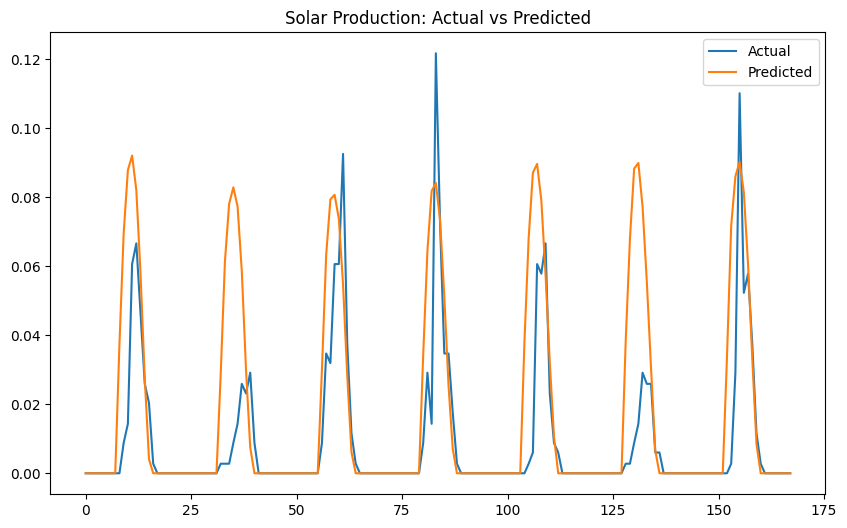

In [12]:
# Convert y_test to its original scale
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# Set all negative predictions to 0
# next_week_prediction = np.clip(next_week_prediction, 0, None)
#print mae
print('Mean Absolute Error:', np.mean(np.abs(y_test_original - next_week_prediction)))
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(next_week_prediction, label='Predicted')
# plt.ylim(bottom=0)  # Set the lower limit of y-axis to 0
plt.legend()
plt.title('Solar Production: Actual vs Predicted')
plt.show()

Mean Absolute Error:  0.0028502289205789566


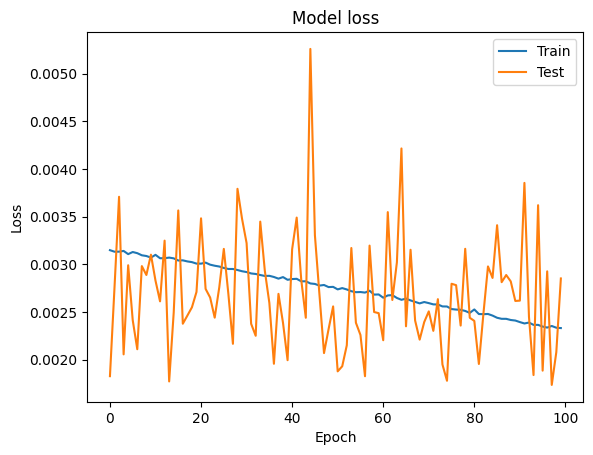

In [11]:
# Fit the model and save the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
#print mae
print('Mean Absolute Error: ', history.history['val_loss'][-1])
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()